## author :  Ashok kumar
### grip task 7 : Stock Market Prediction using Numerical and Textual Analysis
### data science and business analysis

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from datetime import datetime

In [37]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
price = pd.read_csv('^BSESN.csv')
sent = pd.read_csv('india-news-headlines.csv')

In [39]:
price.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-11,41183.390625,41444.339844,41179.140625,41216.140625,41216.140625,7700.0
1,2020-02-12,41330.851563,41671.859375,41330.851563,41565.898438,41565.898438,9600.0
2,2020-02-13,41707.210938,41709.300781,41338.308594,41459.789063,41459.789063,9100.0
3,2020-02-14,41510.191406,41702.359375,41183.128906,41257.738281,41257.738281,9800.0
4,2020-02-17,41324.039063,41420.339844,41030.578125,41055.691406,41055.691406,6900.0


In [40]:
sent.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [41]:
pd.set_option("display.max_rows", 99)
pd.set_option("display.max_columns", 99)

In [42]:
sent['index'] = sent.index

In [43]:
sent.tail()

,publish_date,headline_category,headline_text,index
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india,3297167
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...,3297168
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...,3297169
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...,3297170
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...,3297171


In [44]:
sent['publish_date'] = sent['publish_date'].astype(str)


In [45]:
price['Date'] = price['Date'].astype(str)

In [46]:
price = price.dropna()

## Filtering the Headlines Data

In [47]:
filter_list = ['business', 'business.india-business', 'business.international-business', 'business.personal-finance']
sent_2 = sent[sent.headline_category.isin(filter_list)]

In [48]:
sent_2.reset_index(inplace= True)

In [50]:
vader = SentimentIntensityAnalyzer()

columns = ['publish_date', 'headline_category', 'headline_text']

parsed_and_scored_news = pd.DataFrame(sent_2, columns=columns)

scores = parsed_and_scored_news['headline_text'].apply(vader.polarity_scores).tolist()

scores_df = pd.DataFrame(scores)
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['publish_date'] = pd.to_datetime(parsed_and_scored_news.publish_date).dt.date

parsed_and_scored_news.head()

,publish_date,headline_category,headline_text,neg,neu,pos,compound
0,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,0.0,1.000,0.000,0.0000
1,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.0,0.588,0.412,0.6369
2,2001-05-22,business.india-business,Samsung says hello to cellular unit in India,0.0,1.000,0.000,0.0000
3,2001-05-22,business.india-business,Govt lifts port-linked curbs on imports,0.0,1.000,0.000,0.0000
4,2001-05-22,business.india-business,RIL plans to mop up to Rs 1;000cr,0.0,1.000,0.000,0.0000


In [62]:
data = price.join(parsed_and_scored_news, lsuffix='_caller', rsuffix='_other')

In [63]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text,neg,neu,pos,compound
0,2020-02-11,41183.390625,41444.339844,41179.140625,41216.140625,41216.140625,7700.0,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,0.0,1.000,0.000,0.0000
1,2020-02-12,41330.851563,41671.859375,41330.851563,41565.898438,41565.898438,9600.0,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.0,0.588,0.412,0.6369
2,2020-02-13,41707.210938,41709.300781,41338.308594,41459.789063,41459.789063,9100.0,2001-05-22,business.india-business,Samsung says hello to cellular unit in India,0.0,1.000,0.000,0.0000
3,2020-02-14,41510.191406,41702.359375,41183.128906,41257.738281,41257.738281,9800.0,2001-05-22,business.india-business,Govt lifts port-linked curbs on imports,0.0,1.000,0.000,0.0000
4,2020-02-17,41324.039063,41420.339844,41030.578125,41055.691406,41055.691406,6900.0,2001-05-22,business.india-business,RIL plans to mop up to Rs 1;000cr,0.0,1.000,0.000,0.0000


In [64]:
data_f = data.drop(['headline_text', 'publish_date','headline_category'], axis = 1)

In [65]:
data_f.head()

,Date,Open,High,Low,Close,Adj Close,Volume,neg,neu,pos,compound
0,2020-02-11,41183.390625,41444.339844,41179.140625,41216.140625,41216.140625,7700.0,0.0,1.000,0.000,0.0000
1,2020-02-12,41330.851563,41671.859375,41330.851563,41565.898438,41565.898438,9600.0,0.0,0.588,0.412,0.6369
2,2020-02-13,41707.210938,41709.300781,41338.308594,41459.789063,41459.789063,9100.0,0.0,1.000,0.000,0.0000
3,2020-02-14,41510.191406,41702.359375,41183.128906,41257.738281,41257.738281,9800.0,0.0,1.000,0.000,0.0000
4,2020-02-17,41324.039063,41420.339844,41030.578125,41055.691406,41055.691406,6900.0,0.0,1.000,0.000,0.0000


In [69]:
data_f.to_csv('data_f.csv',index=False)

In [70]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [71]:
data_f = pd.read_csv('data_f.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [77]:
data_f.head()

,Open,High,Low,Close,Adj Close,Volume,neg,neu,pos,compound
Date,,,,,,,,,,
2020-02-11,41183.390625,41444.339844,41179.140625,41216.140625,41216.140625,7700.0,0.0,1.000,0.000,0.0000
2020-02-12,41330.851563,41671.859375,41330.851563,41565.898438,41565.898438,9600.0,0.0,0.588,0.412,0.6369
2020-02-13,41707.210938,41709.300781,41338.308594,41459.789063,41459.789063,9100.0,0.0,1.000,0.000,0.0000
2020-02-14,41510.191406,41702.359375,41183.128906,41257.738281,41257.738281,9800.0,0.0,1.000,0.000,0.0000
2020-02-17,41324.039063,41420.339844,41030.578125,41055.691406,41055.691406,6900.0,0.0,1.000,0.000,0.0000


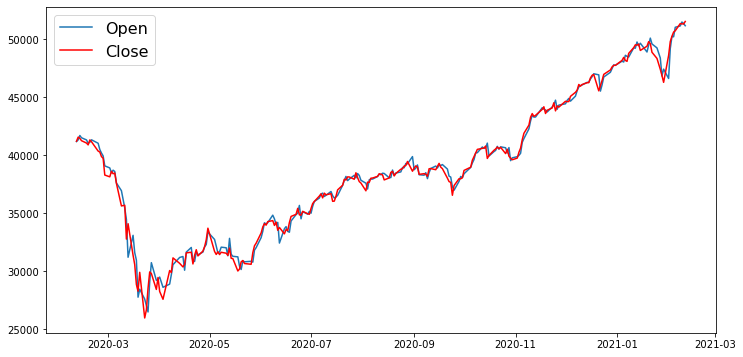

In [78]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['Open'])
close, = plt.plot(data_f['Close'], color='red')

for year in range(2020, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.legend(['Open', 'Close'], fontsize=16)
plt.show()

## normalize the data

In [79]:
avgs = data_f.mean()
devs = data_f.std()

In [80]:

for col in data_f.columns:
    data_f[col] = (data_f[col] - avgs.loc[col]) / devs.loc[col]

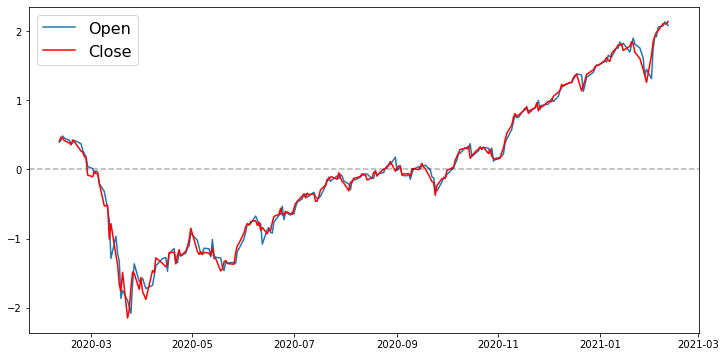

In [82]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['Open'])
close, = plt.plot(data_f['Close'], color='red')

for year in range(2020, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['Open', 'Close'], fontsize=16)

In [83]:
data_f = data_f.diff().dropna()

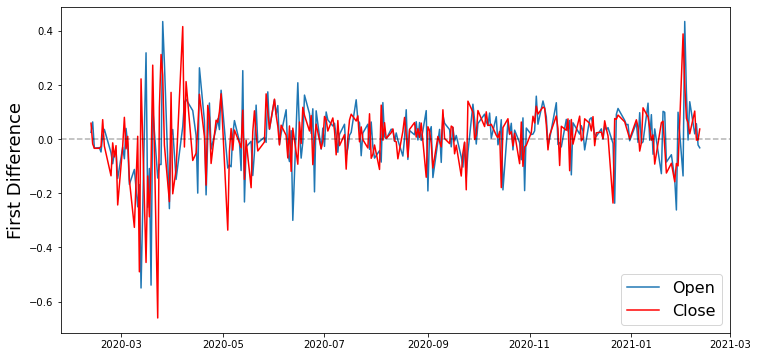

In [84]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['Open'])
close, = plt.plot(data_f['Close'], color='red')

for year in range(2020, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Open', 'Close'], fontsize=16)

In [85]:
annual_volatility = data_f.groupby(data_f.index.year).std()

In [86]:
list(annual_volatility.columns)

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'neg',
 'neu',
 'pos',
 'compound']

In [92]:
data_f['Open_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'Open'])
data_f['close_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'Close'])
data_f['high_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'High'])
data_f['low_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'Low'])
data_f['adj_close_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'Adj Close'])
data_f['volume_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'Volume'])
data_f['neg_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'neg'])
data_f['neu_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'neu'])
data_f['pos_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'pos'])
data_f['compound_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'compound'])

In [97]:
data_f['Open'] = data_f['Open'] / data_f['Open_annual_vol']
data_f['Close'] = data_f['Close'] / data_f['close_annual_vol']
data_f['High'] = data_f['High'] / data_f['high_annual_vol']
data_f['Low'] = data_f['Low'] / data_f['low_annual_vol']
data_f['Adj Close'] = data_f['Adj Close'] / data_f['adj_close_annual_vol']
data_f['Volume'] = data_f['Volume'] / data_f['volume_annual_vol']
data_f['neg'] = data_f['neg'] / data_f['neg_annual_vol']
data_f['neu'] = data_f['neu'] / data_f['neu_annual_vol']
data_f['pos'] = data_f['pos'] / data_f['pos_annual_vol']
data_f['compound'] = data_f['compound'] / data_f['compound_annual_vol']

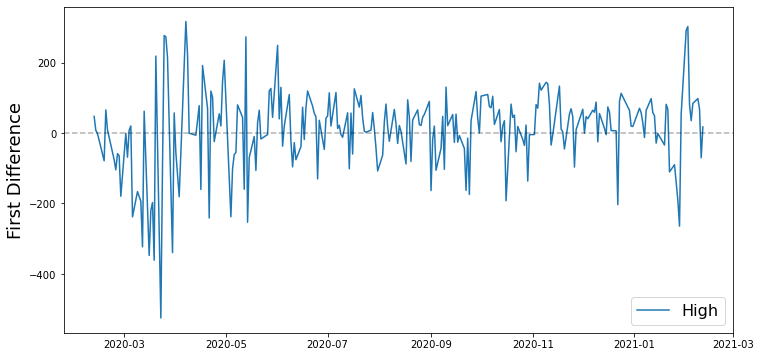

In [99]:

plt.figure(figsize=(12,6))
ice_cream, = plt.plot(data_f['High'])

for year in range(2020, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['High'], fontsize=16)

## Fitting a VAR Model

In [101]:

data_f1 = data_f[['Open' ,	'Close', 	'High', 	'Low', 	'Adj Close' 	,'Volume',	'neg', 	'neu' ,	'pos' ,	'compound']]

data_f2 = data_f1.dropna()

In [102]:
model = VAR(data_f2)

model_fit = model.fit(maxlags =7)

model_fit.summary()

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 11, Feb, 2021
Time:                     07:34:31
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    22.6304
Nobs:                     240.000    HQIC:                   16.4824
Log likelihood:          -4175.48    FPE:                    272610.
AIC:                      12.3335    Det(Omega_mle):         20419.7
--------------------------------------------------------------------
Results for equation Open
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.751942         2.629303            0.286           0.775
L1.Open             -0.991567         0.156998           -6.316           0.000
L1.Close            -1.767771         1.200728           -1.472  